In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.data.ops.dataset_ops import Dataset

In [2]:
train_x = np.arange(1000).astype(np.float32).reshape(-1, 1)
train_y = 3 * train_x + 1

from_tensor_slices()를 사용해서 np.array나 list object를 tensorflow에서 제공해주는 dataset object로 변환할 수 있다. 변환함으로써, tensorflow의 shuffle(), batch() 등 다른 API를 쉽게 사용할 수 있다.

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(100).batch(32)

In [4]:
for x, y in train_ds:
  print(x.shape, y.shape, '\n')

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(8, 1) (8, 1) 



In [5]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(type(train_images))
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import sys
sys.getsizeof(train_images)/1024/1024 # object의 크기를 알아보는 메소드 b / kb / mb

44.8609619140625

In [7]:
train_ds = Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(16)

test_ds = Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(32)

In [8]:
for images, labels in train_ds:
  print(images.shape)
  print(labels.shape)
  
  break

(16, 28, 28)
(16,)


In [9]:
import matplotlib.pyplot as plt

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

print(images.shape, labels.shape)

(16, 28, 28) (16,)


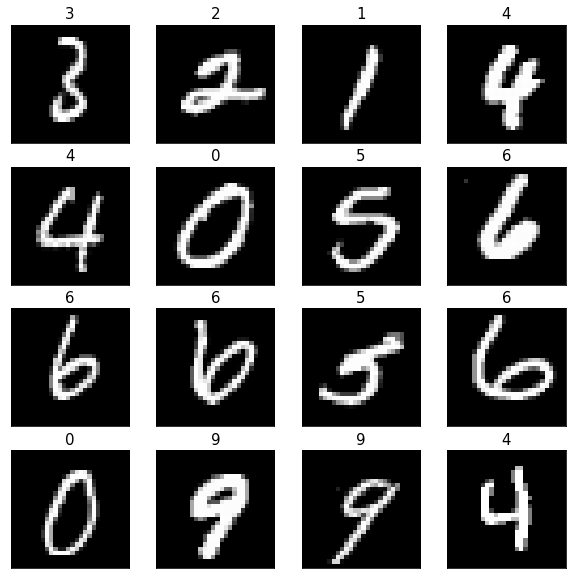

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for ax_idx, ax in enumerate(axes.flat):
  image = images[ax_idx, ...]
  label = labels[ax_idx]
  
  ax.imshow(image.numpy(), 'gray')
  ax.set_title(label.numpy(), fontsize=15)
  
  ax.get_xaxis().set_visible(False) # 축 없애기
  ax.get_yaxis().set_visible(False)